Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


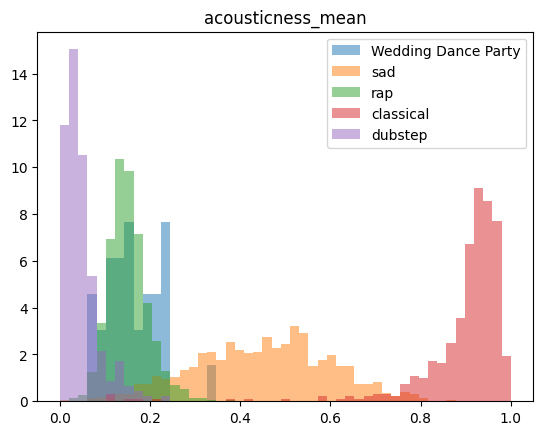

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


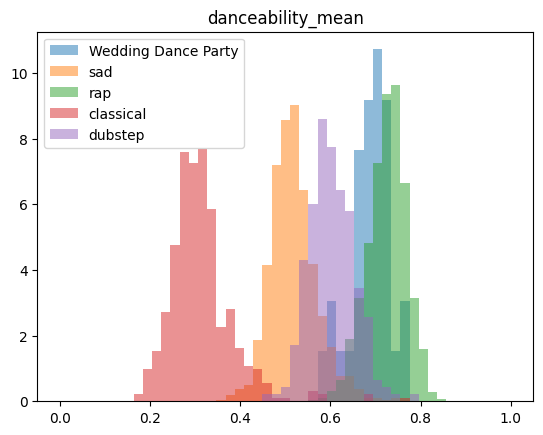

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


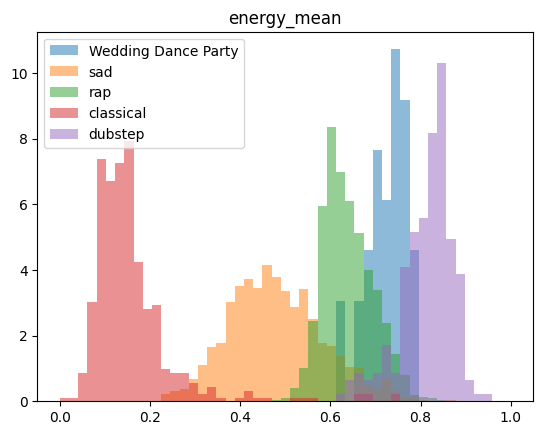

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


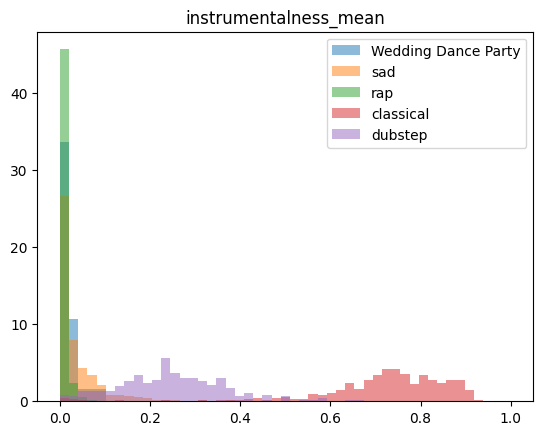

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


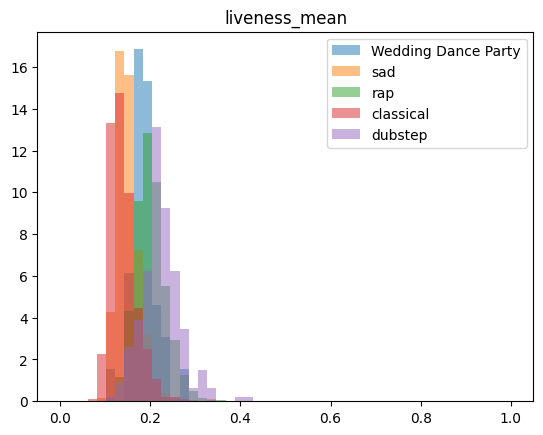

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


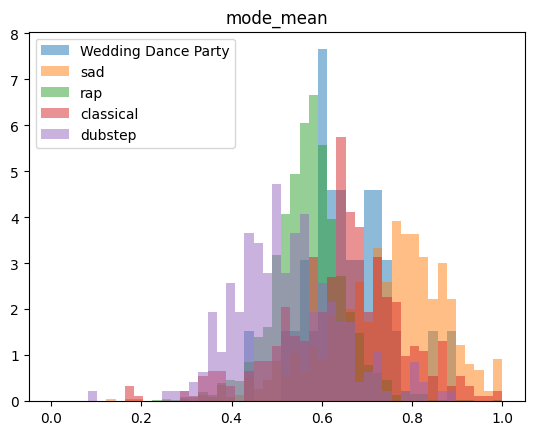

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


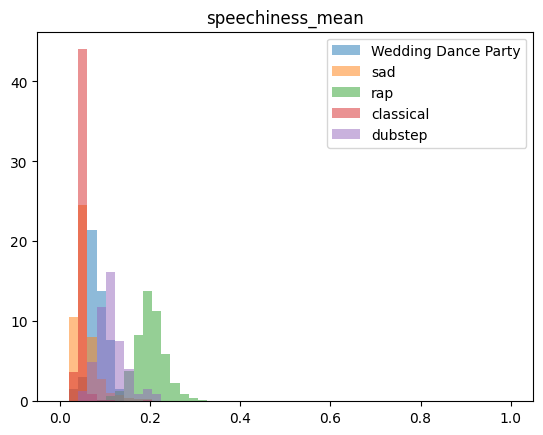

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


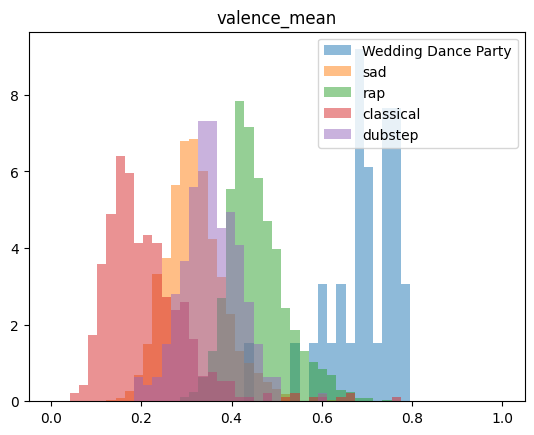

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


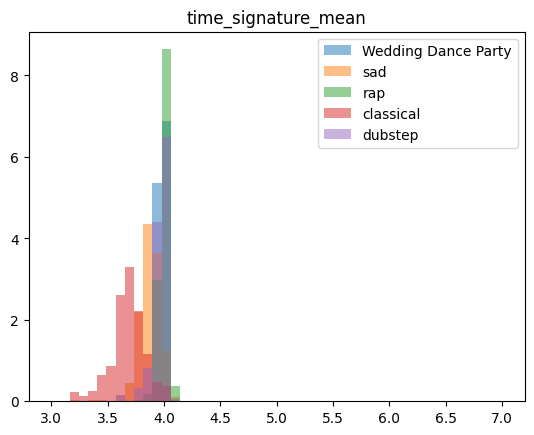

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


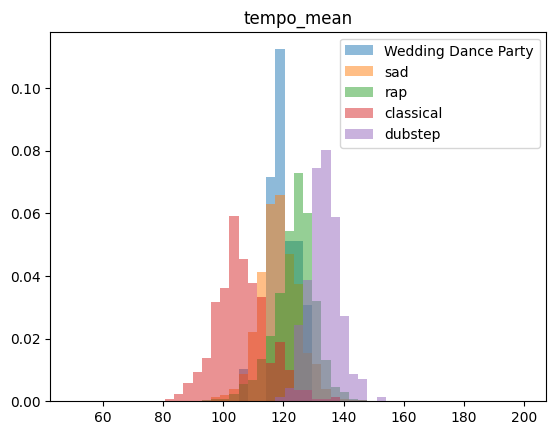

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


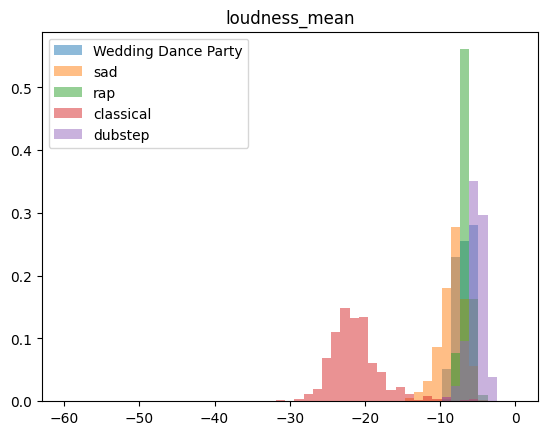

In [43]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

TITLE_DATASET = "../../data/title/title_dataset.db"
SONG_DATASET = "../../data/song/song_dataset.db"

conn = sqlite3.connect(TITLE_DATASET)

n_bins = 50

def plot_statistics(titles):
    """Plot box plot statistics for a given title. 
    Finds all playlists with the given title in the SQL title database and
    queries their aggregated mean audio features. Plots box-and-whisker plot
    to see how the playlists vary for that single title.
    """
    feature_ranges = {
        "acousticness_mean": [0,1],
        "danceability_mean": [0,1],
        "energy_mean": [0,1],
        "instrumentalness_mean": [0,1],
        "liveness_mean": [0,1],
        "mode_mean": [0,1],
        "speechiness_mean": [0,1],
        "valence_mean": [0,1],
        "time_signature_mean": [3,7],
        "tempo_mean": [50, 200],
        "loudness_mean": [-60, 0],
    }

    title_data = {}
    for title in titles:
        all_data = pd.read_sql("SELECT * FROM titles WHERE title=(?)", conn, params=[title])
        title_data[title] = all_data.filter(regex=".*_mean$", axis=1)
    
    for feature, (feature_low, feature_high) in feature_ranges.items():
        plt.figure()
        bins = np.linspace(feature_low, feature_high, n_bins)
        for title, data in title_data.items():
            print("Plotting " + title)
            plt.hist(data[feature], bins=bins, alpha=0.5, density=True, label=title)
        plt.legend()
        plt.title(feature)
        plt.show()


# plot_zero_one_statistics("Wedding Dance Party")
# plot_zero_one_statistics("sad")
# plot_zero_one_statistics("happy vibes")
# plot_zero_one_statistics("1984")
# plot_zero_one_statistics("gym time")

plot_statistics(["Wedding Dance Party", "sad", "rap", "classical", "dubstep"])